In [1]:
!pip install yfinance
!pip install matplotlib

In [2]:
import yfinance as yf
import pandas as pd

In [26]:
tesla=yf.Ticker("TSLA")

In [28]:
tesla_share_price_data=tesla.history(period="max")

In [30]:
tesla_share_price_data.reset_index(inplace=True)

In [32]:
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [36]:
from bs4 import BeautifulSoup
import requests
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data=requests.get(url).text
soup=BeautifulSoup(html_data,"html.parser")


In [40]:
import pandas as pd
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])


In [42]:
table = soup.find('table')

In [80]:
rows = table.find('tbody').find_all('tr')
for row in rows:
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
        tesla_revenue = pd.concat([tesla_revenue, new_row], ignore_index=True)
       
    



In [62]:
# Handle missing or non-string values in the Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].fillna('').astype(str)

# Clean the Revenue column by removing commas and dollar signs
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').replace('', '0').astype(float)


In [66]:
tesla_revenue.tail()

,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


In [82]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2021-06-30')

# Reset the index to make Date a column
tesla_data.reset_index(inplace=True)

# Select relevant columns
tesla_data = tesla_data[['Date', 'Close']]

# Print the first few rows to verify
print(tesla_data.head())


[*********************100%***********************]  1 of 1 completed

Price        Date     Close
Ticker                 TSLA
0      2010-06-29  1.592667
1      2010-06-30  1.588667
2      2010-07-01  1.464000
3      2010-07-02  1.280000
4      2010-07-06  1.074000


In [68]:
gamestop=yf.Ticker("GME")
gme_data=gamestop.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [ ]:
from bs4 import BeautifulSoup
import requests
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2=requests.get(url).text
soup=BeautifulSoup(html_data_2,'html.parser')

In [70]:
import pandas as pd
gme_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
table1=soup.find('table')
rows = table1.find('tbody').find_all('tr')
for row in rows:
    columns = row.find_all('td')
    if len(columns) >= 2:
        date = columns[0].text.strip()
        revenue = columns[1].text.strip()
        new_row = pd.DataFrame({'Date': [date], 'Revenue': [revenue]})
        gme_revenue = pd.concat([gme_revenue, new_row], ignore_index=True)
# Handle missing or non-string values in the Revenue column
gme_revenue['Revenue'] = gme_revenue['Revenue'].fillna('').astype(str)

# Clean the Revenue column by removing commas and dollar signs
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '').replace('', '0').astype(float)


In [72]:
gme_revenue.tail()

,Date,Revenue
8,2013,2013.0
9,2012,413.0
10,2011,204.0
11,2010,117.0
12,2009,112.0


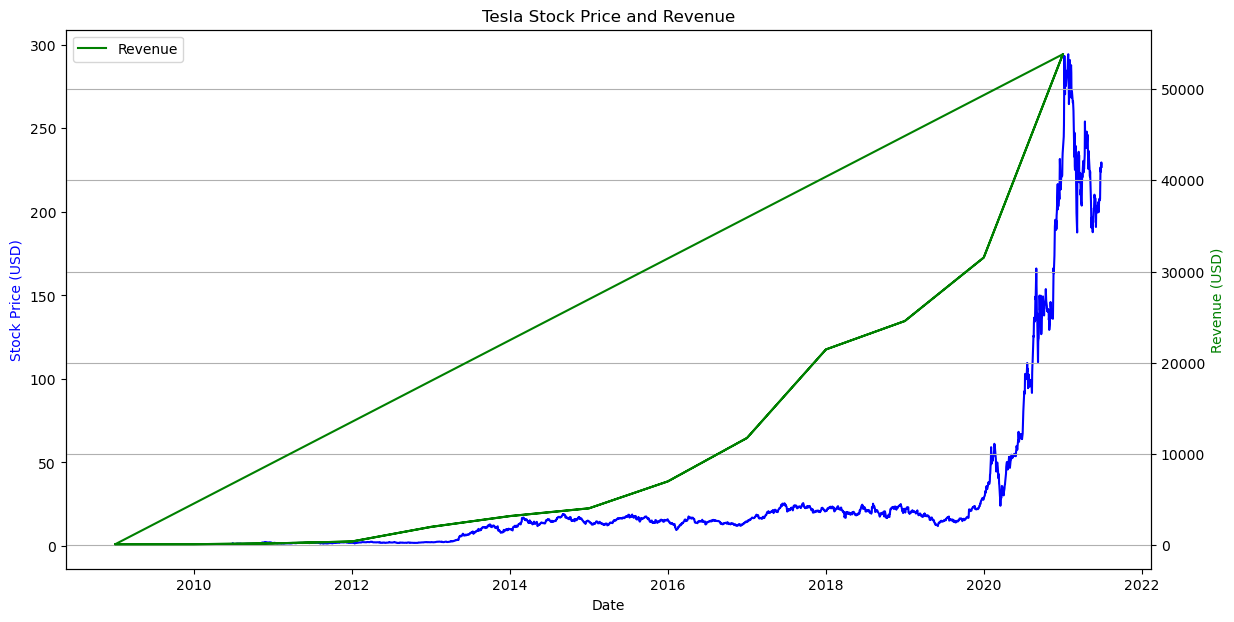

In [106]:
# Assuming tesla_data and tesla_revenue DataFrames are already created and preprocessed
# Convert Date columns to datetime


# Filter data up to June 2021
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']
# Clean and convert the Revenue column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'$': '', ',': ''}, regex=True)
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Drop rows with missing Revenue values
tesla_revenue.dropna(subset=['Revenue'], inplace=True)

# Ensure Date is in datetime format (if not already done)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])


# Call the make_graph function
make_graph(tesla_data, tesla_revenue, 'Tesla')


In [86]:
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))

    # Plot stock prices
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)', color='blue')

    # Create a second y-axis for revenue
    ax2 = plt.gca().twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green')
    ax2.set_ylabel('Revenue (USD)', color='green')

    # Add title and legend
    plt.title(f'{title} Stock Price and Revenue')
    plt.legend(loc='upper left')
    plt.grid()
    plt.show()


In [90]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
gme_data = yf.download('GME', start='2010-01-01', end='2021-06-30')

# Reset the index to make Date a column
gme_data.reset_index(inplace=True)

# Select relevant columns
gme_data = gme_data[['Date', 'Close']]

# Print the first few rows to verify
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date   Close
Ticker                GME
0      2010-01-04  5.7250
1      2010-01-05  5.8800
2      2010-01-06  6.0075
3      2010-01-07  5.1150
4      2010-01-08  5.0725


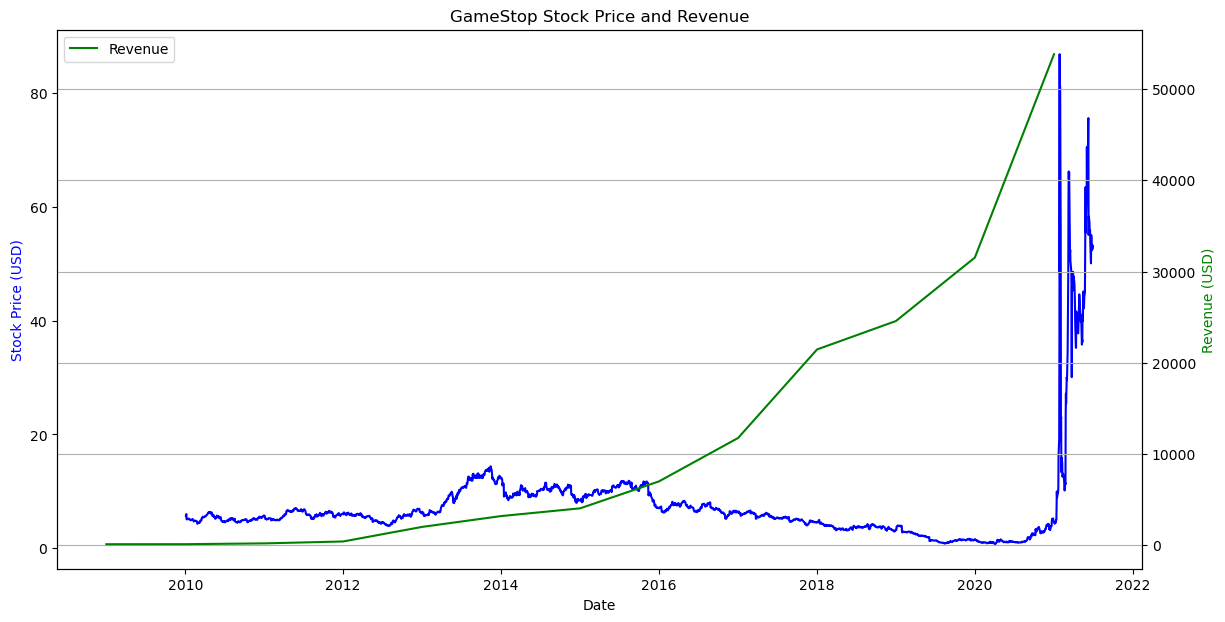

In [108]:
gme_data = gme_data[gme_data['Date'] <= '2021-06-30']
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace({'$': '', ',': ''}, regex=True)
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Drop rows with missing Revenue values
gme_revenue.dropna(subset=['Revenue'], inplace=True)

# Ensure Date is in datetime format (if not already done)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
# Call the make_graph function
make_graph(gme_data, gme_revenue, 'GameStop')

In [4]:
import requests

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"
response = requests.get(url)

with open("apple.json", "wb") as file:
    file.write(response.content)


In [5]:
import json
with open('apple.json') as json_file:
    apple_info=json.load(json_file)
apple_info 

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [6]:
apple_info['country']

'United States'

In [7]:
apple_share_price_data=apple.history(period="max")

In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098834,0.099264,0.098834,0.098834,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094108,0.094108,0.093678,0.093678,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087232,0.087232,0.086802,0.086802,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088951,0.089381,0.088951,0.088951,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091530,0.091959,0.091530,0.091530,73449600,0.0,0.0


In [9]:
apple_share_price_data.reset_index(inplace=True)

<Axes: xlabel='Date'>

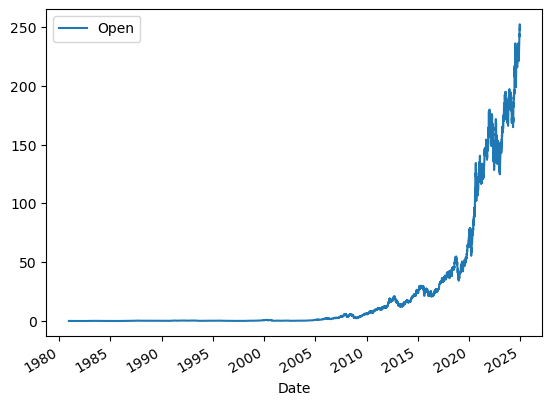

In [10]:
apple_share_price_data.plot(x="Date", y="Open")

In [22]:
!pip install nbformat
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [24]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)